# KNN


<img src="images/knn.png">


In [1]:
# Importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# On charge les données
dataset = pd.read_csv('datasets/diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# On sépare le dataset
X = dataset.drop('Outcome',axis=1).values
y = dataset['Outcome'].values
X.shape


(768, 8)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)

In [10]:
neighbors = np.arange(1,21)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

In [9]:

print(test_accuracy)

[0.64935065 0.7012987  0.66883117 0.68181818 0.7012987  0.70779221
 0.72077922 0.72727273 0.74025974 0.73376623 0.73376623 0.72077922
 0.74025974 0.74025974 0.74025974 0.73376623 0.73376623 0.74025974
 0.73376623 0.72077922]


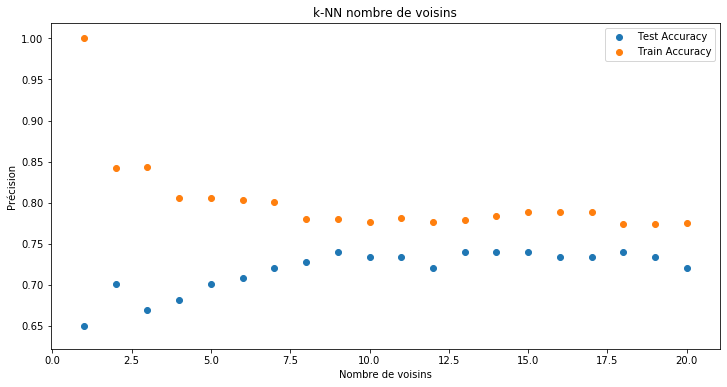

In [11]:
#Visualisation
plt.figure(figsize=(12,6))
plt.title('k-NN nombre de voisins')
plt.scatter(neighbors, test_accuracy, label='Test Accuracy')
plt.scatter(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision')
plt.show()

In [18]:
knn1 = KNeighborsClassifier(n_neighbors=13)
knn1.fit(X,y)
knn1.score(X,y)

0.7838541666666666

In [19]:
topredict = [0,137,40,35,170,43,2.33,34]

knn1.predict([topredict])

array([1], dtype=int64)

In [5]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5,population_size=50, verbosity=2,n_jobs=-1)
tpot.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 0.7785285885645742
Generation 2 - Current best internal CV score: 0.783353325336532
Generation 3 - Current best internal CV score: 0.783353325336532
Generation 4 - Current best internal CV score: 0.7849526855924297
Generation 5 - Current best internal CV score: 0.7850193256030921

Best pipeline: LinearSVC(GaussianNB(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False)), C=20.0, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)